In [26]:
import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import adjusted_rand_score

In [28]:
data = dt.get_data('A549', 'healthy', 'sars-cov2', series = (2, 5))
columns_healthy = dt.get_columns('A549', 'healthy', series = (2, 5))
columns_sars_cov2 = dt.get_columns('A549', 'sars-cov2', series = (2, 5))

filtered_data = dt.get_p_values('welch', data, columns_healthy, columns_sars_cov2)
filtered_data

,Series2_A549_Mock_1,Series2_A549_Mock_2,Series2_A549_Mock_3,Series2_A549_SARS-CoV-2_1,Series2_A549_SARS-CoV-2_2,Series2_A549_SARS-CoV-2_3,Series5_A549_Mock_1,Series5_A549_Mock_2,Series5_A549_Mock_3,Series5_A549_SARS-CoV-2_1,Series5_A549_SARS-CoV-2_2,Series5_A549_SARS-CoV-2_3,p-value
ISG15,4.510860,3.761200,3.637586,7.257708,7.125283,6.777647,4.477337,3.871201,4.060443,4.343805,3.871201,4.709530,0.030101
CCNL2,7.469084,7.052721,6.731018,7.731053,7.625595,7.480428,7.570959,7.492760,7.291656,7.516977,7.527256,8.306225,0.040608
SLC35E2B,6.738152,6.232448,5.948035,6.830874,6.697034,6.418365,6.542472,6.522093,6.426488,6.739337,6.684612,7.200425,0.041069
ARHGEF16,5.293305,4.465908,4.543295,5.347108,5.198497,4.976734,5.030438,4.897840,4.762174,4.852030,5.247024,5.583496,0.049927
CEP104,6.555357,5.968708,5.780744,6.622736,6.516193,6.236370,6.300786,6.202536,6.137727,6.345636,6.440947,6.974479,0.037184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMLHE,5.556828,4.919981,4.605170,5.852202,5.717028,5.278115,5.497168,5.393628,5.337538,5.634790,5.765191,6.159095,0.023268
RPS4Y1,6.765039,6.070738,5.888878,6.951772,6.669498,6.436150,6.431331,6.361302,6.249975,6.711740,6.782192,7.363280,0.014855
UTY,4.060443,3.401197,2.995732,4.564348,4.007333,3.496508,3.663562,3.663562,3.526361,3.806662,4.304065,4.653960,0.030483
NLGN4Y,2.639057,2.772589,2.484907,3.367296,3.178054,2.564949,2.484907,2.484907,2.639057,2.995732,3.295837,3.295837,0.002370


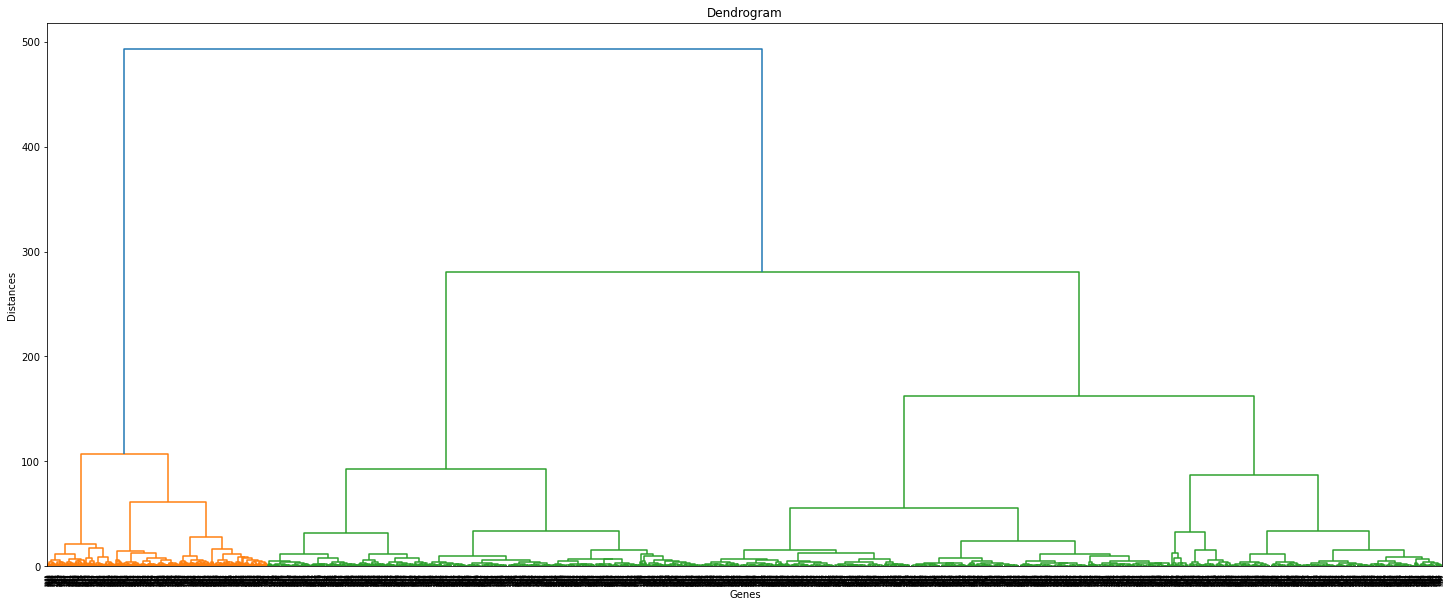

In [29]:
filtered_data.drop(['p-value'], axis = 1, inplace = True)
dt.plot_dendrogram(filtered_data)

In [8]:
labels = {}

models = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
labels['distance'] = models.fit_predict(filtered_data)

In [9]:
labels['distance']

array([2, 0, 0, ..., 2, 1, 2], dtype=int64)

In [10]:
dissimilarity = 1 - np.abs(filtered_data.T.corr())
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['pearson'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [11]:
labels['pearson']

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [12]:
dissimilarity = 1 - np.abs(filtered_data.T.corr(method='spearman'))
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['spearman'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [13]:
labels['spearman']

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [14]:
from itertools import groupby

clusters = {}

for key1, label1 in labels.items():
    clusters[key1] = [list(map(lambda x: x[0], v)) for k,v in groupby(sorted(zip(filtered_data.index, labels['spearman']), key = lambda x: x[1]), lambda s: s[1])]
    
    for key2, label2 in labels.items():
        if key1 != key2:
            print(key1, ' vs ', key2, ': ', adjusted_rand_score(label1, label2))

distance  vs  pearson :  0.019413472705641744
distance  vs  spearman :  0.028126211419059823
pearson  vs  distance :  0.019413472705641744
pearson  vs  spearman :  0.5062502539307807
spearman  vs  distance :  0.028126211419059823
spearman  vs  pearson :  0.5062502539307807


In [ ]:
i = 0
for c in clusters['distance']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['pearson']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['spearman']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

## Clustering on columns

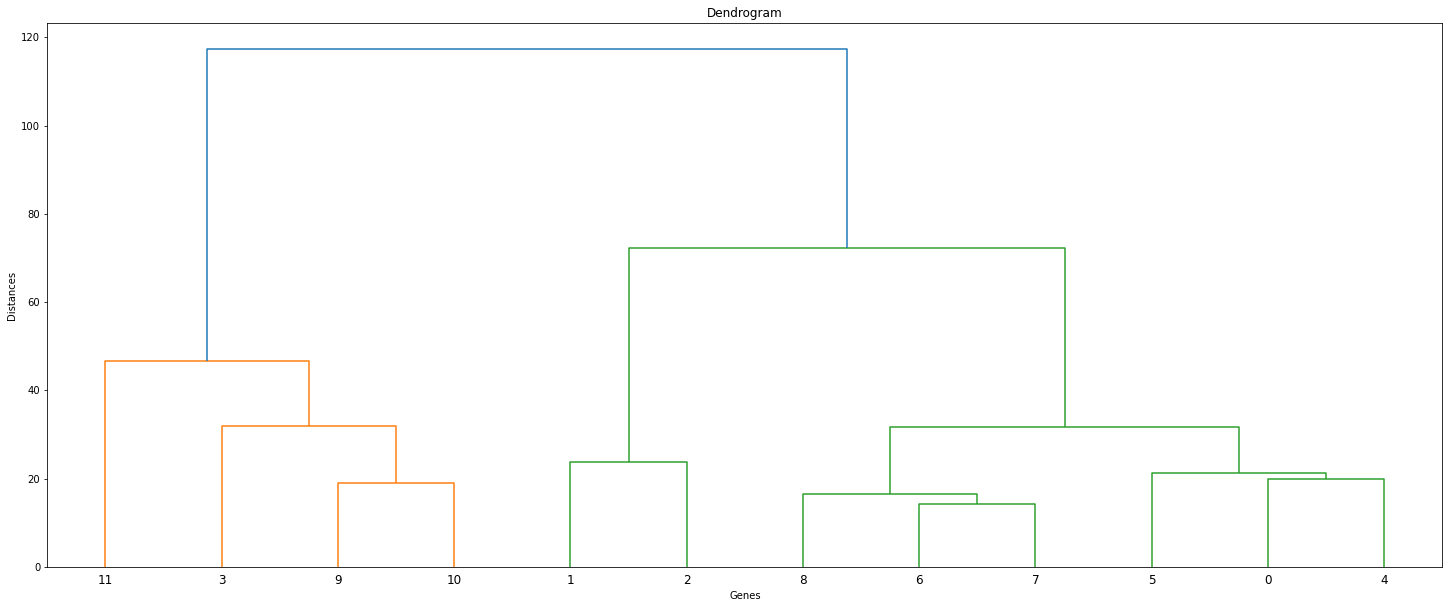

In [23]:
dt.plot_dendrogram(filtered_data.T)

In [25]:
labels_columns = {}

models = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
labels_columns['distance'] = models.fit_predict(filtered_data.T)

labels_true = [0 if col in columns_healthy else 1 for col in filtered_data.columns]

print("True: ", labels_true)
print("Predicted: ", labels_columns['distance'])
print(adjusted_rand_score(labels_true, labels_columns['distance']))

True:  [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
Predicted:  [0 0 0 1 0 0 0 0 0 1 1 1]
0.39560439560439553
